In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.primitives import Estimator, Sampler
from qiskit.quantum_info import SparsePauliOp
import matplotlib.pyplot as plt

In [2]:
n_sites=4
num_qubits=2*n_sites

In [3]:

qc = QuantumCircuit(num_qubits)
qc.barrier()
for i in range(n_sites):
    if i*2!=2:
        qc.x(i*2)

/Users/lizhelun/miniforge3/envs/qc/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


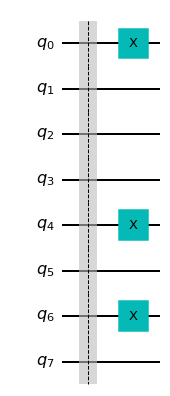

In [4]:
qc.draw('mpl')

In [11]:
class Z2_state():
    kind = 'canine'         # class variable shared by all instances

    def __init__(self, n_sites,m=2,f=0,J=2):
        self.n_sites = n_sites 
        self.n_qubits = 2*n_sites
        self.J = J
        self.m = m
        self.f = f
        self.qc = QuantumCircuit(self.n_qubits)
        #circuit initialization:
        
        for i in range(n_sites-1):
            self.qc.h(i*2+1)
            
        for i in range(n_sites):
            if i*2!=2:
                self.qc.x(i*2)
                
    def timeEvolve(self,n_steps):
        self.T=2/self.J
        self.dt=self.T/20
        self.qc.barrier()
        alpha = (-0.5)*self.J*self.dt
        for step in range(n_steps):
            self.qc.barrier()
            for site in range(self.n_sites):
                q=2*site
                q1=(q+1)%self.n_qubits
                q2=(q+2)%self.n_qubits
                
                self.qc.cx(q2,q)
                self.qc.h(q1)
                self.qc.z(q2)
                self.qc.cx(q2,q1)
                self.qc.ry(alpha,q2)
                self.qc.cx(q,q2)
                self.qc.ry(-alpha,q2)
                self.qc.cx(q,q2)
                self.qc.cx(q2,q1)
                self.qc.h(q1)
                self.qc.rz(-np.pi/2,q2)
                self.qc.cx(q2,q)
                
                
            #Periodic?
            for site in range(self.n_sites-1):
                qubit=2*site+1 #on links
                self.qc.rx(-1*self.f*self.dt,qubit)
                
            for site in range(self.n_sites):
                qubit=2*site
                self.qc.rz((-1)**(site)*(self.m/2)*self.dt,qubit)
                
    def reset(self):
        self.qc = QuantumCircuit(self.n_qubits)
        #circuit initialization:
        
        for i in range(n_sites-1):
            self.qc.h(i*2+1)
            
        for i in range(n_sites):
            if i*2!=2:
                self.qc.x(i*2)

In [40]:
estimator=Estimator()

ob_list=[]

#Symmetric ones:
# ob_list.append(SparsePauliOp.from_list([("X" * num_qubits, 1)]))
# ob_list.append(SparsePauliOp.from_list([("Y" * num_qubits, 1)]))
# ob_list.append(SparsePauliOp.from_list([("Z" * num_qubits, 1)]))

# ob_list.append(SparsePauliOp.from_list([("XXII", 1)]))
# ob_list.append(SparsePauliOp.from_list([("IXXI", 1)]))
# ob_list.append(SparsePauliOp.from_list([("IIXX", 1)]))

# ob_list.append(SparsePauliOp.from_list([("YYII", 1)]))
# ob_list.append(SparsePauliOp.from_list([("IYYI", 1)]))
# ob_list.append(SparsePauliOp.from_list([("IIYY", 1)]))

#ob_list.append(SparsePauliOp.from_list([("ZZII", 1)]))
#ob_list.append(SparsePauliOp.from_list([("IZZI", 1)]))
#ob_list.append(SparsePauliOp.from_list([("IIZZ", 1)]))

# ob_list.append(SparsePauliOp.from_list([("XXXI", 1)]))
# ob_list.append(SparsePauliOp.from_list([("IXXX", 1)]))

# ob_list.append(SparsePauliOp.from_list([("YYYI", 1)]))
# ob_list.append(SparsePauliOp.from_list([("YYYI", 1)]))

# ob_list.append(SparsePauliOp.from_list([("ZZZI", 1)]))
# ob_list.append(SparsePauliOp.from_list([("IZZZ", 1)]))

for i in range(num_qubits-1):
    ob_list.append(SparsePauliOp.from_list([("I"*(i)+"ZZ"+"I"*(num_qubits-2-i), 1)]))
    


In [42]:
ob_list

[SparsePauliOp(['ZZIIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IZZIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IIZZIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IIIZZIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IIIIZZII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IIIIIZZI'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IIIIIIZZ'],
               coeffs=[1.+0.j])]

/Users/lizhelun/miniforge3/envs/qc/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


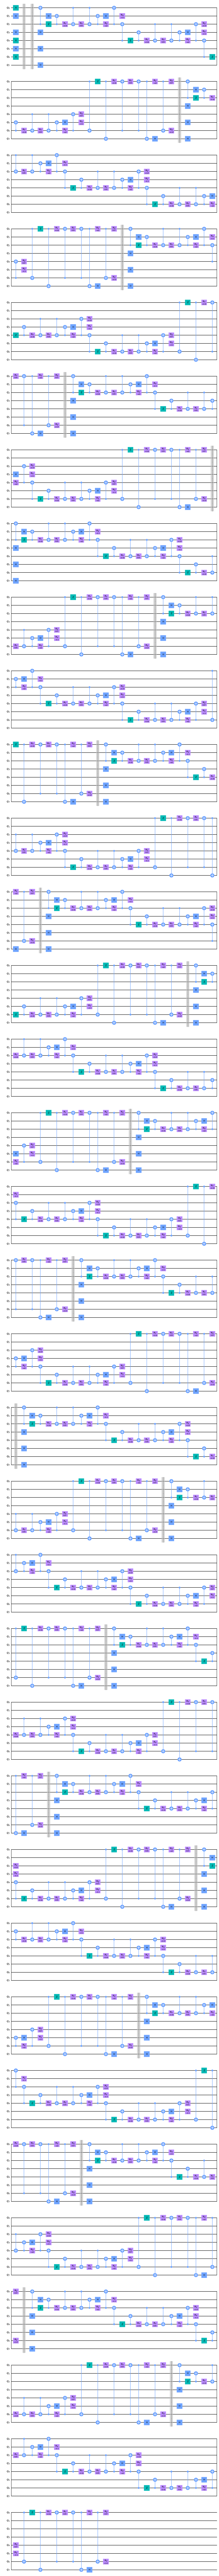

In [85]:
z2_3.qc.draw('mpl')

In [59]:
J=2
x_train_deconf=[]
y_train_deconf=[]
x_train_conf=[]
y_train_conf=[]

for i in range(50):
    print(i)
    m = i*J/50
    
    z2_0=Z2_state(n_sites,m=m,f=0,J=J)
    results_list_0=[]
    z2_0.timeEvolve(20)
    results_0=estimator.run(circuits=[z2_0.qc]*len(ob_list),
                            observables=ob_list,shots=2**14).result().values
    x_train_deconf.append(results_0)
    y_train_deconf.append(0)
    
    z2_3=Z2_state(n_sites,m=m,f=3*J,J=J)
    results_list_3=[]
    z2_3.timeEvolve(20)
    results_3=estimator.run(circuits=[z2_3.qc]*len(ob_list),
                            observables=ob_list,shots=2**14).result().values
    x_train_conf.append(results_3)
    y_train_conf.append(1)

x_train=np.array(x_train_deconf+x_train_conf)
y_train=np.array(y_train_deconf+y_train_conf)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [60]:

x_test_deconf=[]
y_test_deconf=[]
x_test_conf=[]
y_test_conf=[]

for i in range(10):
    m = 1+i*J/10
    
    z2_0=Z2_state(n_sites,m=m,f=0,J=J)
    results_list_0=[]
    z2_0.timeEvolve(20)
    results_0=estimator.run(circuits=[z2_0.qc]*len(ob_list),
                            observables=ob_list,shots=2**14).result().values
    x_test_deconf.append(results_0)
    y_test_deconf.append(0)
    
    z2_3=Z2_state(n_sites,m=m,f=3*J,J=J)
    results_list_3=[]
    z2_3.timeEvolve(20)
    results_3=estimator.run(circuits=[z2_3.qc]*len(ob_list),
                            observables=ob_list,shots=2**14).result().values
    x_test_conf.append(results_3)
    y_test_conf.append(1)

x_test=np.array(x_test_deconf+x_test_conf)
y_test=np.array(y_test_deconf+y_test_conf)

In [61]:
import tensorflow as tf


In [86]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),  
])

loss_fn = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [87]:
history = model.fit(x_train, y_train, validation_split = 0.1 ,epochs=400)


Epoch 1/400
3/3 [==============================] - 0s 26ms/step - loss: 0.6863 - accuracy: 0.4444 - val_loss: 0.6461 - val_accuracy: 1.0000
Epoch 2/400
3/3 [==============================] - 0s 5ms/step - loss: 0.6835 - accuracy: 0.4444 - val_loss: 0.6397 - val_accuracy: 1.0000
Epoch 3/400
3/3 [==============================] - 0s 6ms/step - loss: 0.6807 - accuracy: 0.4444 - val_loss: 0.6338 - val_accuracy: 1.0000
Epoch 4/400
3/3 [==============================] - 0s 6ms/step - loss: 0.6782 - accuracy: 0.4444 - val_loss: 0.6278 - val_accuracy: 1.0000
Epoch 5/400
3/3 [==============================] - 0s 5ms/step - loss: 0.6756 - accuracy: 0.4444 - val_loss: 0.6231 - val_accuracy: 1.0000
Epoch 6/400
3/3 [==============================] - 0s 6ms/step - loss: 0.6732 - accuracy: 0.4444 - val_loss: 0.6177 - val_accuracy: 1.0000
Epoch 7/400
3/3 [==============================] - 0s 6ms/step - loss: 0.6708 - accuracy: 0.4444 - val_loss: 0.6137 - val_accuracy: 1.0000
Epoch 8/400
3/3 [=========

3/3 [==============================] - 0s 5ms/step - loss: 0.0575 - accuracy: 1.0000 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 118/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0560 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 1.0000
Epoch 119/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0544 - accuracy: 1.0000 - val_loss: 0.0493 - val_accuracy: 1.0000
Epoch 120/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0530 - accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 121/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 1.0000 - val_loss: 0.0468 - val_accuracy: 1.0000
Epoch 122/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0502 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 1.0000
Epoch 123/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0489 - accuracy: 1.0000 - val_loss: 0.0441 - val_accuracy: 1.0000
Epoch 124/400
3/3 [========

3/3 [==============================] - 0s 5ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 234/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 235/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 236/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 237/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 238/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 239/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 240/400
3/3 [========

3/3 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 350/400
3/3 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 351/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 352/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 353/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 354/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 355/400
3/3 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 356/400
3/3 [========

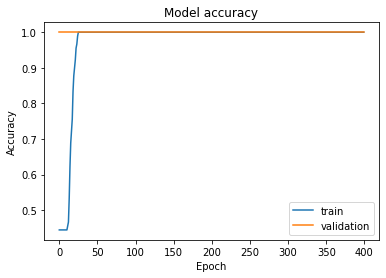

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

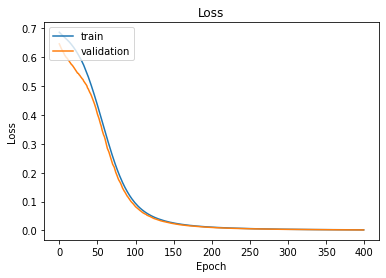

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [90]:
predict_train=model.predict(x_train).flatten()
predict_test=model.predict(x_test).flatten()

1/1 [==============================] - 0s 7ms/step


In [91]:
predict_train.shape

(100,)

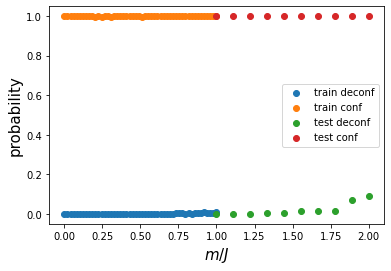

In [92]:


plt.scatter(np.linspace(0,1,50),predict_train[0:50],label='train deconf')
plt.scatter(np.linspace(0,1,50),predict_train[50:],label='train conf')

plt.scatter(np.linspace(1,2,10),predict_test[0:10],label='test deconf')
plt.scatter(np.linspace(1,2,10),predict_test[10:],label='test conf')

#plt.scatter(mass_test,predict_test,label='test')

plt.xlabel('$m/J$',fontsize='15')
plt.ylabel('probability',fontsize='15')
plt.legend()

In [93]:
x_train[0]

array([-4.76065081e-01, -2.99233350e-04, -1.32302742e-02, -1.72794898e-02,
        1.27055618e-02, -2.15039101e-04,  1.39049074e-04])

In [94]:
x_train[-1]

array([-0.98190809, -0.00150484, -0.01466319,  0.00538731, -0.01108523,
        0.00577998,  0.00946639])

In [95]:
x_train.shape

(100, 7)

# 